In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
#set higher dpi for figures
plt.rcParams['figure.dpi'] = 150

Load some required packages, and read the datafiles (convertd from excel to CSV format).

In [2]:
hypa = "hypaCas9.csv"
dfh = pd.read_csv(hypa)
sa = "SaCas9.csv"
dfs = pd.read_csv(sa)

First 10 rows of hypa dataset

In [3]:
dfh.head(10)

,MM,Type,K1,K2
0,1 MM,20A,0.2422,0.3012
1,1 MM,20G,0.2630,0.2444
2,1 MM,20C,0.4533,0.4082
3,1 MM,20T,1.8900,1.8370
4,1 MM,19A,0.7560,0.9296
5,1 MM,19G,0.7446,0.7134
6,1 MM,19C,0.4377,0.3896
7,1 MM,19T,0.4338,0.4269
8,1 MM,18A,0.8515,0.6161
9,1 MM,18G,0.2883,0.1599


First 10 rows of Sa dataset

In [4]:
dfs.head(10)

,MM,Type,K1,K2
0,1 MM,20A,0.7751,0.9633
1,1 MM,20G,0.7208,0.7441
2,1 MM,20C,0.9748,0.7674
3,1 MM,20T,0.9919,0.9028
4,1 MM,19A,1.4960,2.0400
5,1 MM,19G,2.7750,1.4010
6,1 MM,19C,0.9207,0.7247
7,1 MM,19T,1.5410,0.5849
8,1 MM,18A,1.4060,1.5410
9,1 MM,18G,1.7140,1.4340


descriptive statistics for hypa

In [5]:
print(dfh.describe())

               K1          K2
count  959.000000  959.000000
mean     0.284407    0.252972
std      0.498053    0.467777
min      0.000000    0.000000
25%      0.000369    0.000322
50%      0.012080    0.008014
75%      0.297650    0.266750
max      2.997000    2.496000


descriptive statistics for Sa

In [6]:
print(dfs.describe())

               K1          K2
count  959.000000  959.000000
mean     0.188766    0.211184
std      0.402208    0.346368
min      0.000000    0.000000
25%      0.000320    0.001890
50%      0.008940    0.050610
75%      0.204550    0.266450
max      5.106000    2.658000


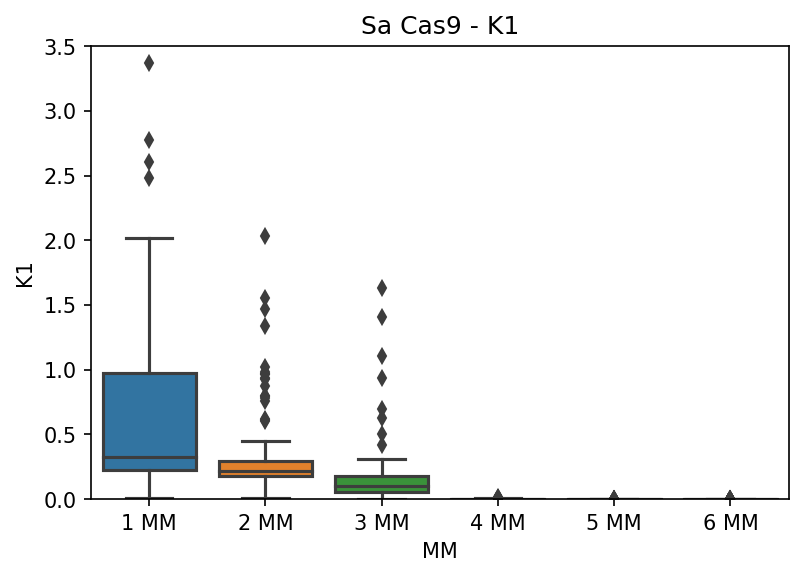

In [7]:
sns.boxplot(x="MM", y="K1", data = dfs)
plt.title('Sa Cas9 - K1')
plt.ylim(0 , 3.5)
plt.show()

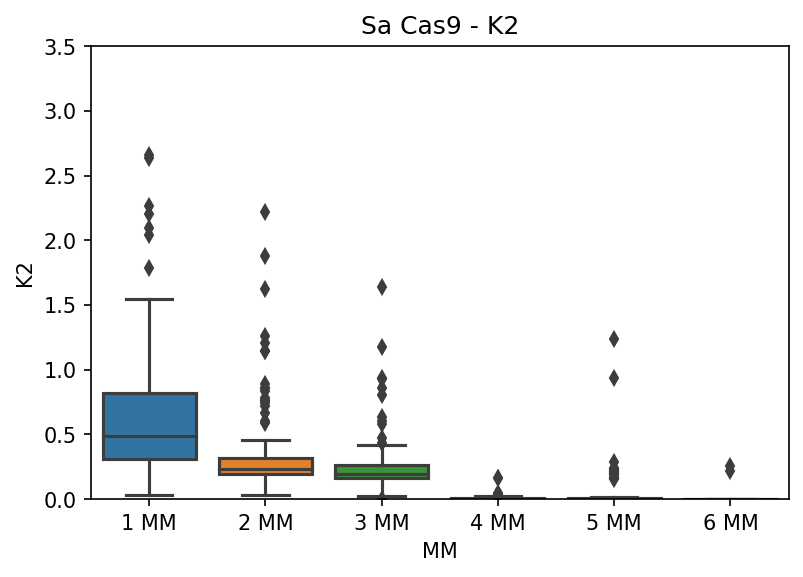

In [8]:
sns.boxplot(x="MM", y="K2", data = dfs)
plt.title('Sa Cas9 - K2')
plt.ylim(0 , 3.5)
plt.savefig('boxplot_SaCas9-K2.png')
plt.show()

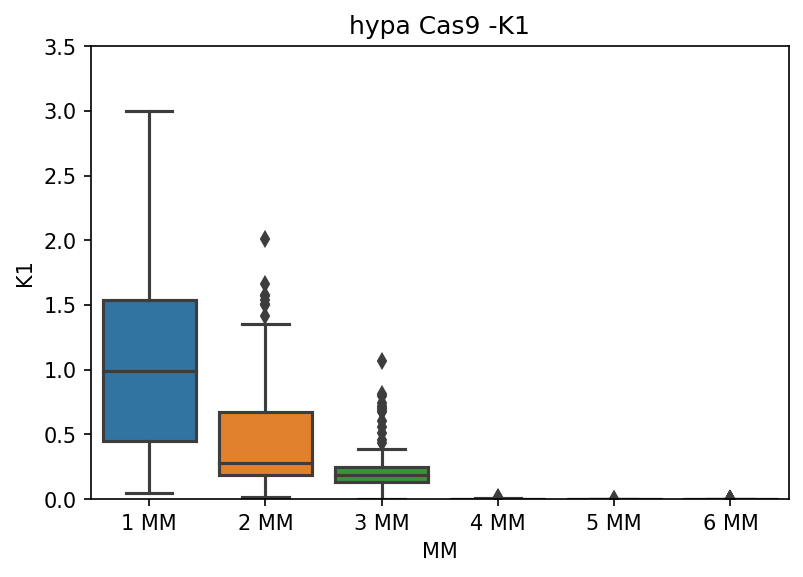

In [9]:
sns.boxplot(x="MM", y="K1", data = dfh)
plt.title('hypa Cas9 -K1')
plt.ylim(0 , 3.5)
plt.savefig('boxplot_hypaCas9-K1.png')
plt.show()

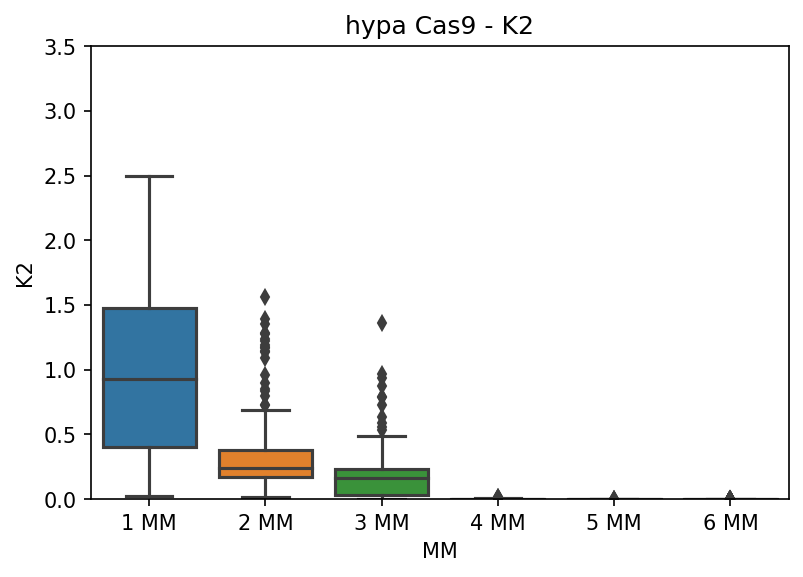

In [10]:
sns.boxplot(x="MM", y="K2", data = dfh)
plt.title('hypa Cas9 - K2')
plt.ylim(0 , 3.5)
plt.savefig('boxplot_hypaCas9-K1.png')
plt.show()

There are clearly outliers in both K1 and K2 of Sa and Hypa dataset. With >1 mismatch specifically many datapoints were outliers (outside the interquartile range).

## Corelation plots for Sa Cas9 dataset

In [11]:
x = dfs['K1']
y = dfs['K2']

In [12]:
print(scipy.stats.pearsonr(x, y))

(0.8115720948985786, 1.3753463085015473e-225)


In [13]:
print(scipy.stats.spearmanr(x, y))

SpearmanrResult(correlation=0.8852126905222857, pvalue=2.417e-320)


In [14]:
print(scipy.stats.kendalltau(x, y))

KendalltauResult(correlation=0.7240411866310411, pvalue=3.4316728941721886e-237)


In [15]:
print(scipy.stats.linregress(x, y))

LinregressResult(slope=0.6988978887877033, intercept=0.07925625252352048, rvalue=0.8115720948985781, pvalue=1.3753463085028934e-225, stderr=0.01626413890876595)


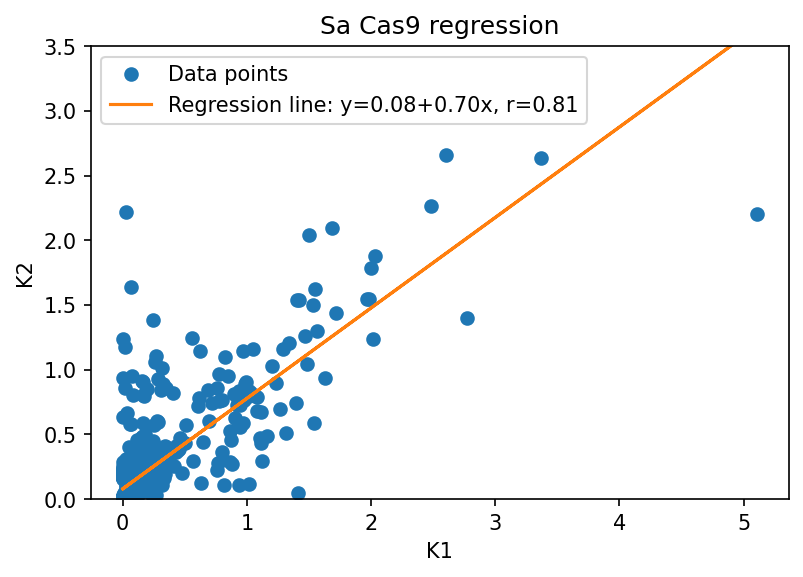

In [16]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('K1')
ax.set_ylabel('K2')
ax.legend(facecolor='white')
plt.ylim(ymax = 3.5, ymin = 0)
plt.title('Sa Cas9 regression')
plt.savefig('regression_SaCas9.png')
plt.show()

## Corelation plots for hypa Cas9 dataset

In [17]:
x = dfh['K1']
y = dfh['K2']

In [18]:
print(scipy.stats.pearsonr(x, y))

(0.9707831221331557, 0.0)


In [19]:
print(scipy.stats.spearmanr(x, y))

SpearmanrResult(correlation=0.9873245182224624, pvalue=0.0)


In [20]:
print(scipy.stats.kendalltau(x, y))

KendalltauResult(correlation=0.9216686932142392, pvalue=0.0)


In [21]:
print(scipy.stats.linregress(x, y))

LinregressResult(slope=0.9117708240107306, intercept=-0.006342042511278068, rvalue=0.9707831221331557, pvalue=0.0, stderr=0.007285239349189512)


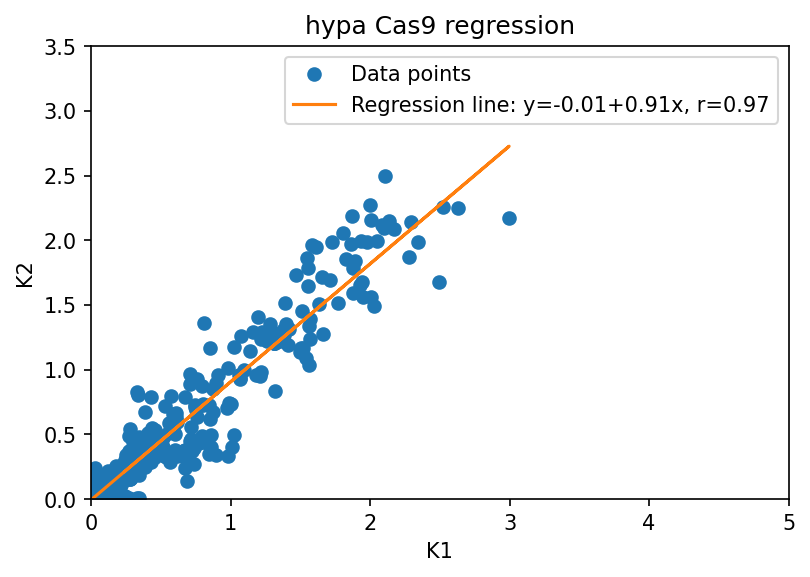

In [23]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('K1')
ax.set_ylabel('K2')
plt.ylim(ymax = 3.5, ymin = 0)
plt.xlim(xmax = 5, xmin = 0)
ax.legend(facecolor='white')
plt.title('hypa Cas9 regression')
plt.savefig('regression_hypaCas9.png')
plt.show()